In [1]:
# TSA EXPERIMENT 1

# lambda values in hpfilter
# 6.25 for yearly
# 100 for half yearly
# 1600 for weekly

### **PLOTTING THE DATASET**

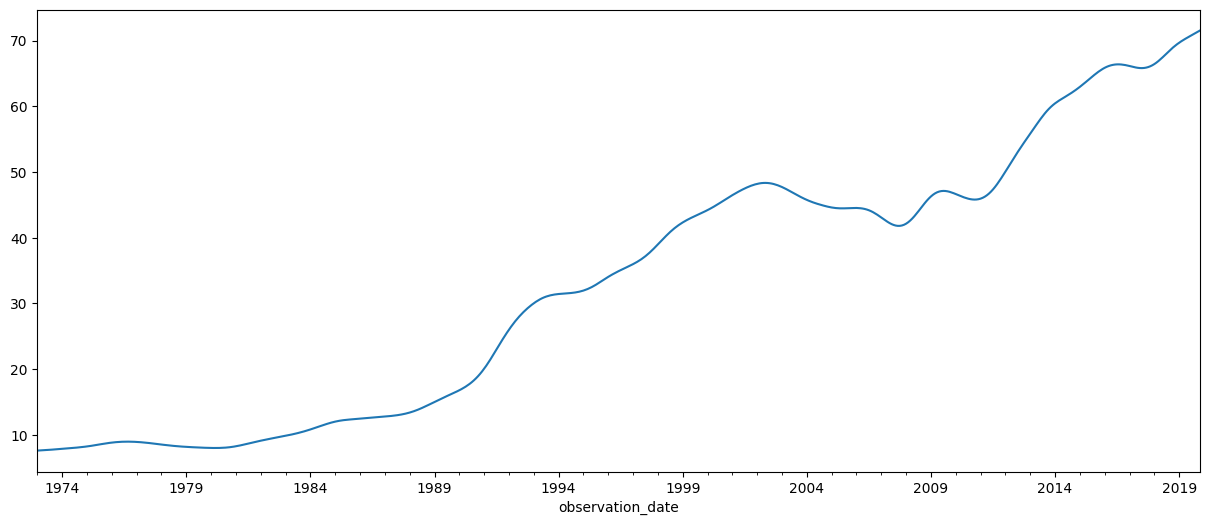

In [42]:
# for india exchange rate dataset
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_excel("/content/India_Exchange_Rate_Dataset.xls", index_col = 0 , parse_dates = True)
exinus_cycle, exinus_trend = hpfilter(df["EXINUS"], lamb=1600)
exinus_trend.plot(figsize=(15,6)).autoscale(axis='x', tight=True)

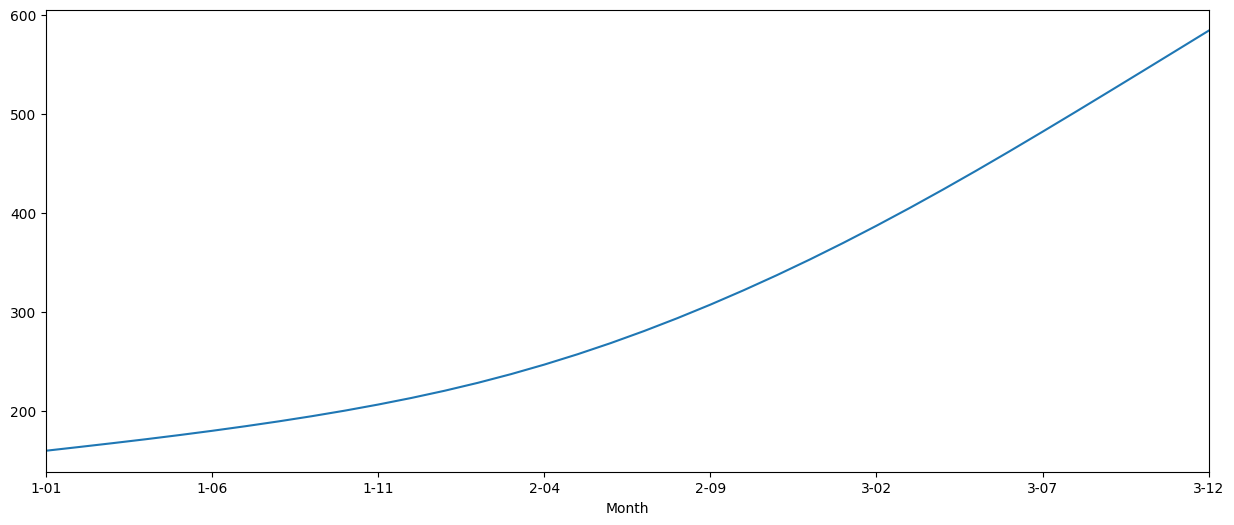

In [41]:
# on dataset shampoo
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df2 = pd.read_csv("shampoo.csv", index_col = 0 , parse_dates = True)
sales_cycle, sales_trend = hpfilter(df2["Sales"], lamb=1600)
sales_trend.plot(figsize = (15,6)).autoscale(axis='x', tight=True)

### **ON INDIA DATASET USING SCRATCH**

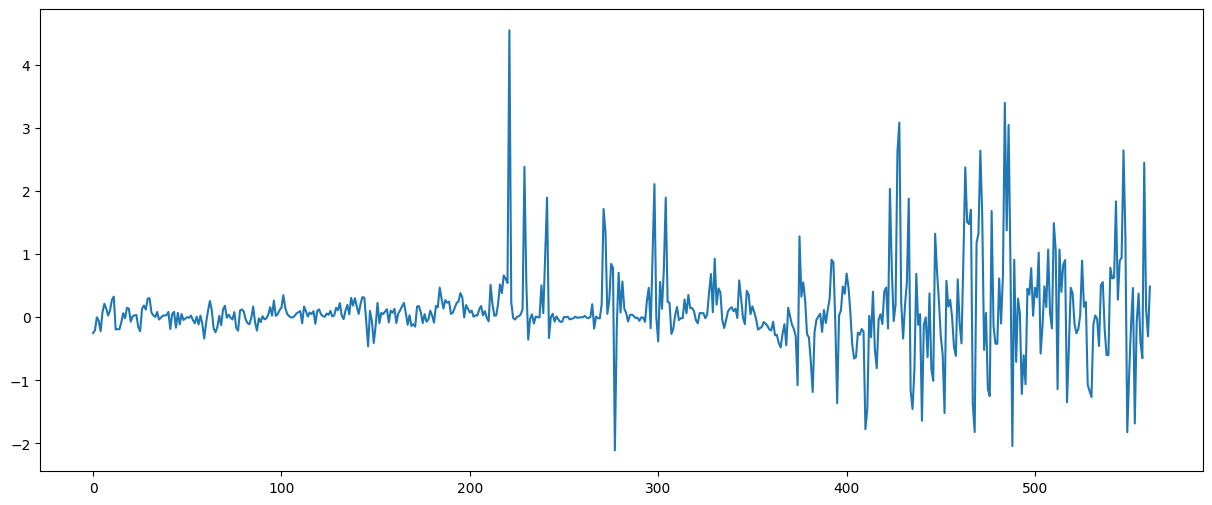

In [40]:
# on india exchange rate
# from scratch
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt

series = pd.read_excel("/content/India_Exchange_Rate_Dataset.xls", index_col = 0 , parse_dates = True)
X = series.values
diff = list()
for i in range(1 , len(X)):
  value = X[i] - X[i-1]
  diff.append(value)

plt.figure(figsize = (15,6))
plt.plot(diff)

### **ON SHAMPOO USING SCRATCH**

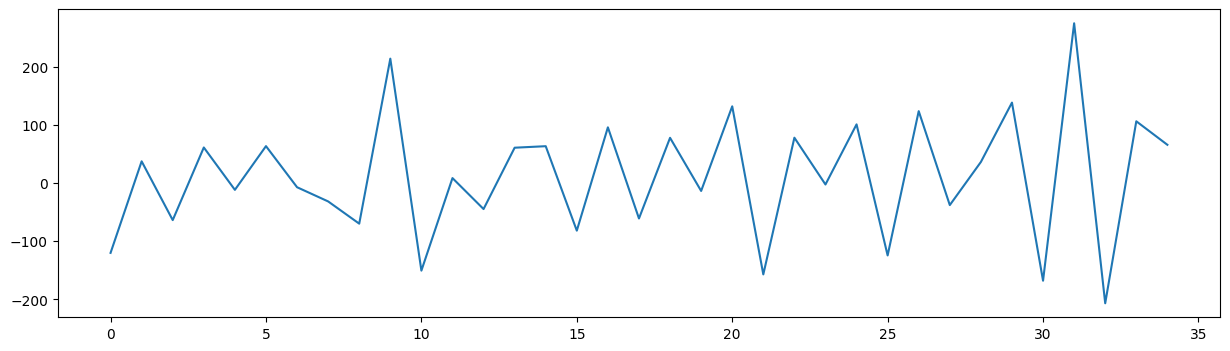

In [45]:
# on shampoo
# from scratch
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt

def parse(X):
  return datetime.strptime('190'+X , '%Y-%m')

series2 = pd.read_csv("/content/shampoo.csv", index_col = 0 , parse_dates = True, date_parser = parse)
X2 = series2.values
diff2 = list()
for i in range(1 , len(X2)):
  value = X2[i] - X2[i-1]
  diff2.append(value)

plt.figure(figsize = (15,4))
plt.plot(diff2)

### **USING PANDAS**


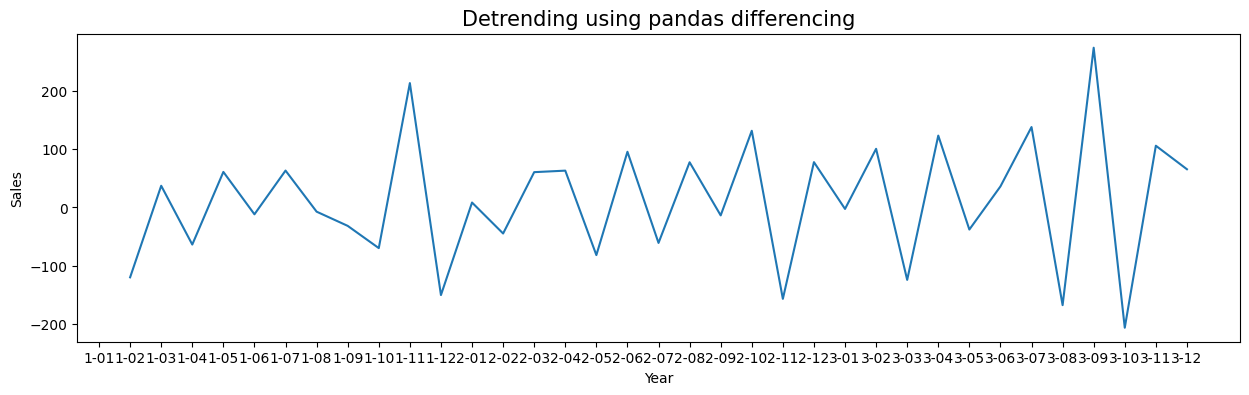

In [43]:
# detrending on shampoo
# using function pandas

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
shampoo = pd.read_csv("/content/shampoo.csv", index_col = 0 , parse_dates = True)
diff = shampoo.Sales.diff()
plt.figure(figsize = (15,4))
plt.plot(diff)
plt.title("Detrending using pandas differencing", fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### **USING SCIPY**

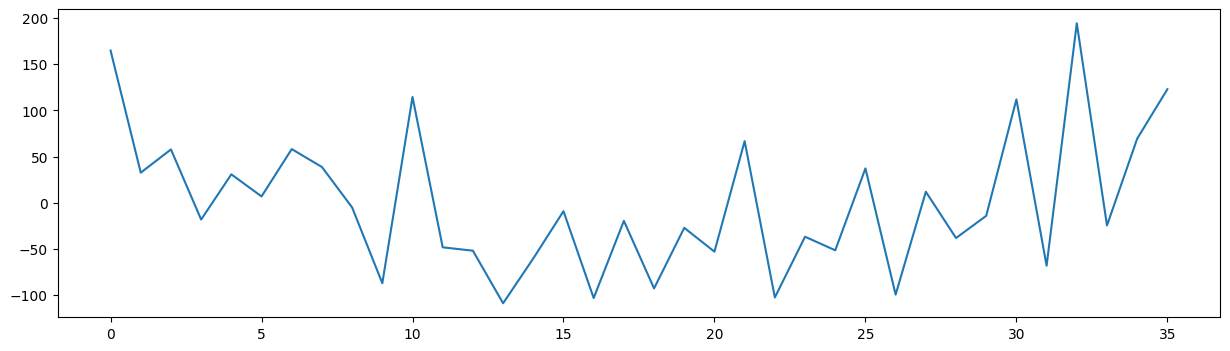

In [47]:
# using scipy submodule
# on shampoo dataset
import pandas as pd
import matplotlib.pyplot as plt
from scipy  import signal
# there is a difference :
# time difference and frequency difference
# both are 2 different domains
# mostly we go for time domain
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
detrended = signal.detrend(shampoo.Sales.values)
plt.figure(figsize = (15,4))
plt.plot(detrended)

### **USING HP_FILTER**

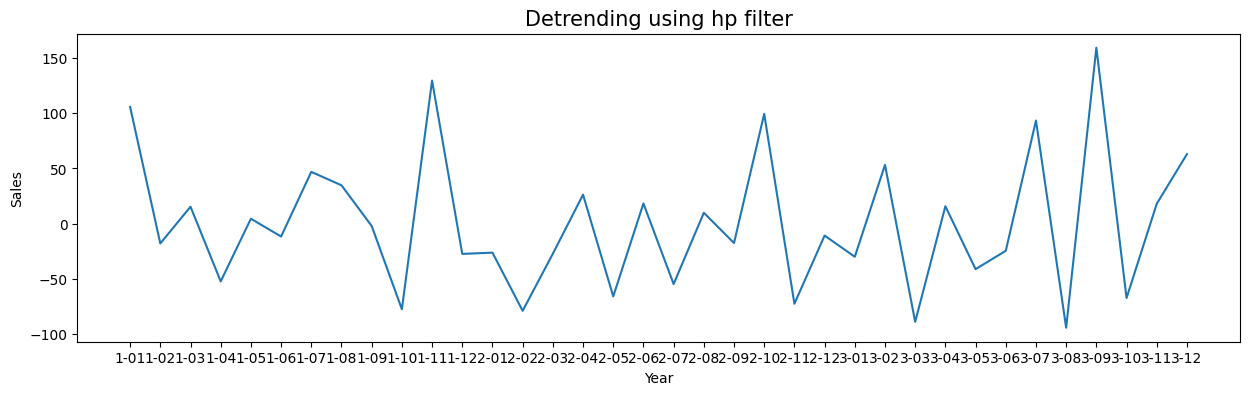

In [60]:
# using hp filter on shampoo
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv("/content/shampoo.csv", index_col = 0 , parse_dates = True)
Sales_cycle, Sales_trend = hpfilter(df["Sales"], lamb = 1600)
df['trend'] = Sales_trend
detrended = df.Sales - df["trend"]
plt.figure(figsize = (15,4))
plt.plot(detrended)
plt.title("Detrending using hp filter", fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### **ON INDIA DATASET USING SCIPY**

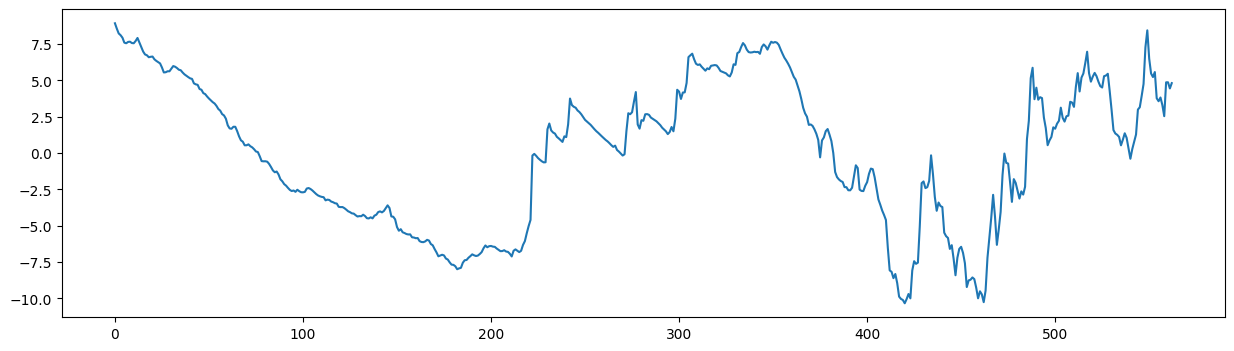

In [56]:
# using scipy submodule
# on INDIA dataset
import pandas as pd
import matplotlib.pyplot as plt
from scipy  import signal
# there is a difference :
# time difference and frequency difference
# both are 2 different domains
# mostly we go for time domain
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
india = pd.read_excel("/content/India_Exchange_Rate_Dataset.xls", index_col = 0)
detrended = signal.detrend(india.EXINUS.values)
plt.figure(figsize = (15,4))
plt.plot(detrended)

### **USING HP_FILTER**

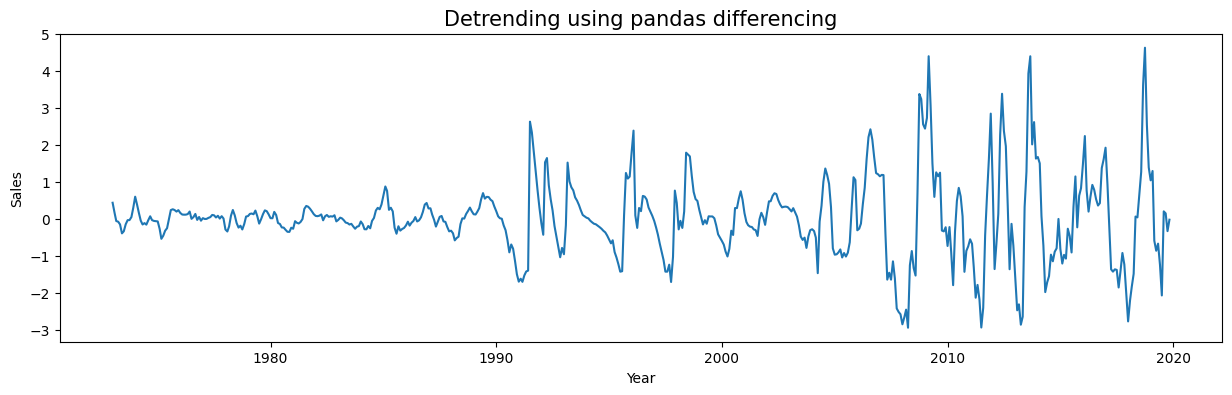

In [58]:
# using hp filter on shampoo
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
india = pd.read_excel("/content/India_Exchange_Rate_Dataset.xls", index_col = 0)
EXINUS_cycle, EXINUS_trend = hpfilter(india["EXINUS"], lamb = 1600)
india['trend'] = EXINUS_trend
detrended = india.EXINUS - india["trend"]
plt.figure(figsize = (15,4))
plt.plot(detrended)
plt.title("Detrending using pandas differencing", fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### **USING DIFF PANDAS**

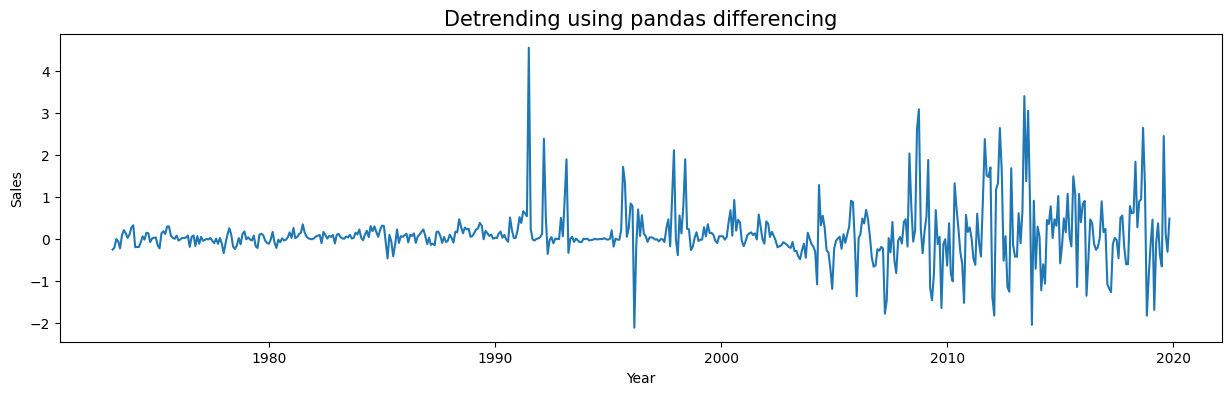

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
india = pd.read_excel("/content/India_Exchange_Rate_Dataset.xls", index_col = 0)
diff = india.EXINUS.diff()
plt.figure(figsize = (15,4))
plt.plot(diff)
plt.title("Detrending using pandas differencing", fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()